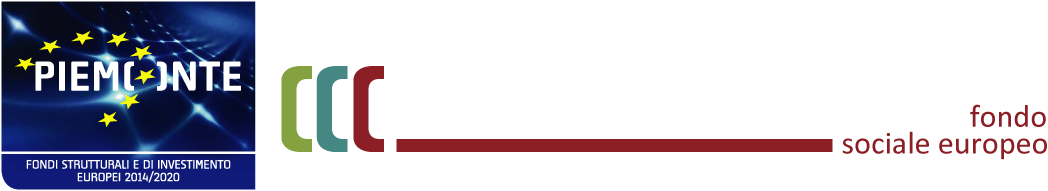





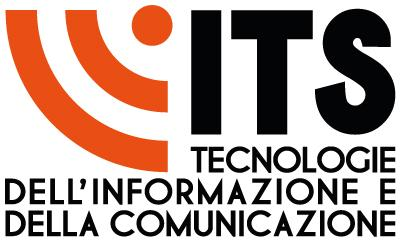




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


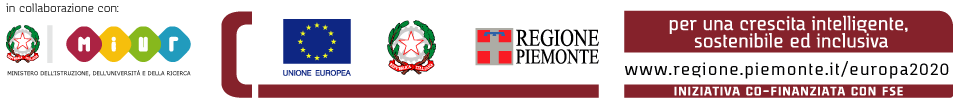



---



NOME: Brian Junior

\

COGNOME: Potosi Ccuno



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **LE PROVE CHE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE COPIATO SARANNO VALUTATE NEGATIVAMENTE**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```
\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**
- importazioni in Italia dal 1985 al 2015
- esportazioni in Italia dal 1985 al 2015

**link**
- importazioni: https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/import.csv
- esportazioni: https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/export.csv

**fonte:** https://seriestoriche.istat.it/






# **Librerie**

Importare nel progetto le librerie necessarie allo svolgimento dell'esercizio.
  

In [1]:
import pandas as pd
import numpy as np
from numpy import var
import math
import matplotlib.pyplot as plt
import random
from matplotlib import colors

# **Organizzazione e preparazione dei dati**


  Nel blocco di codice seguente andranno sviluppate tutte le strutture e le variabili globali da utlizzare nel resto del progetto.

  Viene lasciata totale libertà nell'organizzazione e nella preparazione dei dati. Qualsiasi cheet-sheet può essere usato come riferimento. 
  

  



In [2]:
# ===========================================================================
# salvo gli url raw in variabili pressi direttamente da github del professore
# ===========================================================================
url_importazioni="https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/import.csv"
url_esportazioni="https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/export.csv"
titoli=["Nord-ovest","Nord-est","Centro","Sud","Isole","Regioni diverse e non specificate"]       #salvo i titoli di tutte le regioni d'italia succesivamente mi aiuterano

# ==================================================================================
# ho preferito generare colori in modo random inserendoli in array per poi chiamarli
# ==================================================================================

colors=[]                                                                                         #ciclo per generare colori in modo random
for x in range(6):
  color=color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
  colors.append(color)
# print(colors)

# =========================================================================================================
# ho creato la maskera select ma nella maggior parte degli esercizi ho preferito usare Indexing and Slicing
# =========================================================================================================
def select(df,column: str) -> np.array(np.bool8):
    return df[column].to_numpy()

# ==========================
# salvo i dataframe completi
# ==========================
df_I=pd.read_csv(url_importazioni)
df_E=pd.read_csv(url_esportazioni)
# ==========================================================================================================================================
# ho notato che la colonna Italia è la somma di tutte le regioni cosi per avere la media ho preferita salavarla subito in arrayper ogni anno
# ==========================================================================================================================================

medArr_I=select(df_I,"Italia")/6
medArr_E=select(df_E,"Italia")/6

# ==========================================================================
# ho creato questa function per creare piu facilmente il grafico percentuale
# ==========================================================================

def plot_perc(importazioni,esportazioni):
  explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)                                                  #variabile per salvare i valori esplode del plt.pie
  plt.figure(figsize=(20,18),linewidth=10,edgecolor='peru',facecolor='moccasin')

  centre_circle = plt.Circle((0, 0), 0.70, fc='moccasin')
  fig=plt.gcf()                                                                                   #get current figure mi ha servito per aggiungere il cerchio allinterno del plt.pie
  plot_perc_1=plt.subplot(1,2,1)
  plot_perc_1.set_title("Importazioni")
  plot_perc_1.pie(importazioni,labels=titoli,autopct='%2.2f%%',shadow=True, explode=explode)
  fig.gca().add_artist(centre_circle)                                                             #per aggiungere decorazione plt.pie


  centre_circle = plt.Circle((0, 0), 0.70, fc='moccasin')
  fig=plt.gcf()
  plot_perc_2=plt.subplot(1,2,2)
  plot_perc_2.set_title("Esportazioni")
  plot_perc_2.pie(esportazioni,labels=titoli,autopct="%2.2f%%",shadow=True, explode=explode)
  fig.gca().add_artist(centre_circle)

# ======================================================================
# ho creato questa function per creare piu facilmente il grafico a barre
# ======================================================================

def plot_barh(anni):
  plt.figure(figsize=(20,35),linewidth=20,edgecolor='peru',facecolor='moccasin')
  width_of_bar=0.45                                                                               #grosore delle barre
  plt.barh(anni_I,medArr_I,height=width_of_bar,label="Importazioni")                              #ho optato per usare barh per la sua capacità di visualizzare in modo verticale
  plt.barh(anni_E+width_of_bar,medArr_E,height=width_of_bar,label="Esportazioni")
  plt.yticks(anni_I)

  ax = plt.gca()
  ax.tick_params(labelsize=20)
  ax.set_xlim(xmin=11000000, xmax=75000000)                                                       #valori cosi grandi solo per visualizzare meglio le caselle text con dati(non modifica valori)
  ax.set_facecolor('moccasin')
  plt.legend(bbox_to_anchor =(0.8, 1.05), ncol = 2, prop={'size': 30})

  for x, y in zip(medArr_I,anni_I):                                                               #cicli creati con l'obbiettivo di aggiungere testo con valore in tempo reale
    plt.text(x+2000000 , y, '%.2f' % x, ha='center', va='bottom')
  for x, y in zip(medArr_E,anni_E+width_of_bar):
    plt.text(x+2000000 , y, '%.2f' % x, ha='center', va='bottom')                                 #attenzione parametri ha e va da aprofondire

# **Richiesta 1**

* Visualizzazione dell'andamento delle importazioni per aree geografiche dal 1985 al 2015. 
Visualizzare tutte le aree in un unico layout in modo da poterle confrontare graficamente.
 
* Visualizzazione dell'andamento delle esportazioni per aree geografiche dal 1985 al 2015.
Visualizzare tutte le aree in un unico layout in modo da poterle confrontare graficamente.



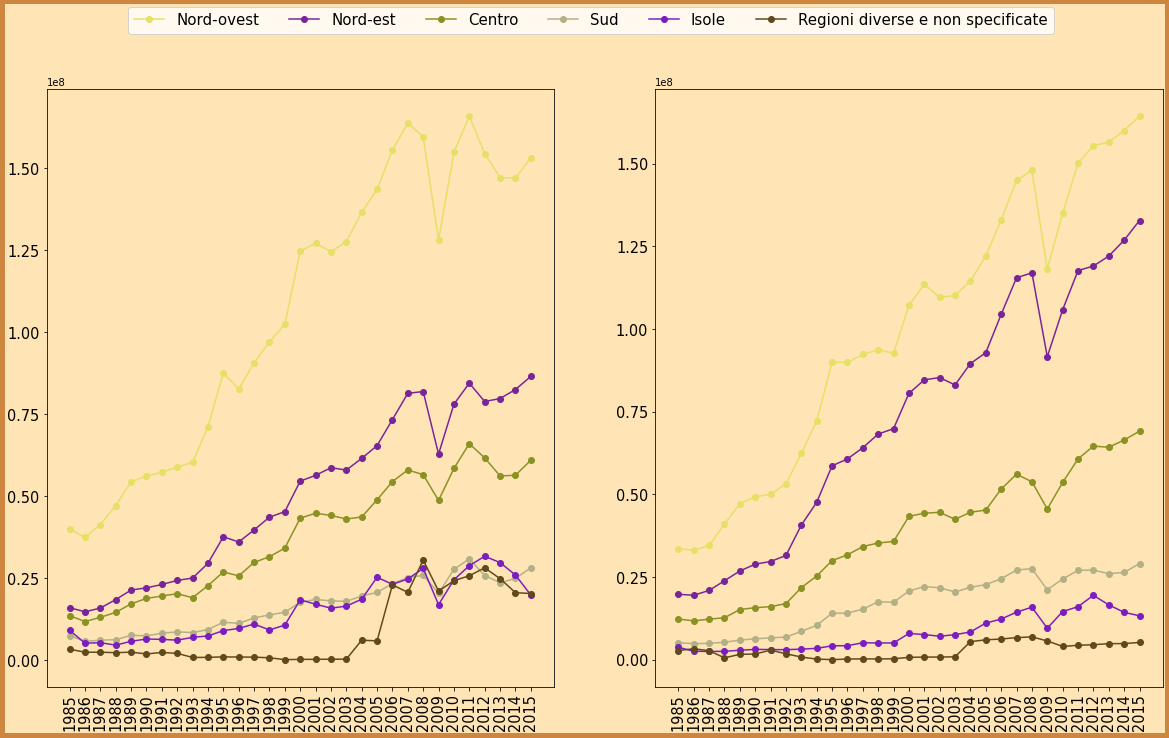

In [3]:
# ====================================================================================
# salvo gli anni in variabili diverse per sottolineare che vengono da diversi dataset
# ====================================================================================

anni_I=select(df_I,"ANNI")
anni_E=select(df_E,"ANNI")

# ==================================================================
# creo il grafico senza uso di funzione per facilitarmi la ideazione
# ==================================================================

plt.figure(figsize=(20,11),linewidth=10,edgecolor='peru',facecolor='moccasin')
plt1=plt.subplot(1,2,1)
plt.xticks(anni_I, rotation=90)                                                                   #mi aiuta a impostare meglio l'asse x in modo da visualizzarlo meglio
ax = plt.gca()
ax.tick_params(labelsize=14.5)                                                                    #dimensione dei dati negli assi
ax.set_facecolor('moccasin')

# ===================================================
# creo un ciclo per facilitarmi linserimento dei dati
# ===================================================

for x in range(1,7,1):                                                                            #imposto il colore dentro il grafico
  plt1.plot(anni_I,df_I.iloc[:, x].to_numpy(int),color=colors[x-1],label=titoli[x-1], marker='o') #marker crea un punto per guardare meglio il posizionamento dei dati

# qui scrivo il ragionamento che ho utilizzato
# plt.scatter(anni_I,df_I.iloc[:, 1].to_numpy(),color=colors[0])
# plt.scatter(anni_I,df_I.iloc[:, 2].to_numpy(),color=colors[1])
# plt.scatter(anni_I,df_I.iloc[:, 3].to_numpy(),color=colors[2])
# plt.scatter(anni_I,df_I.iloc[:, 4].to_numpy(),color=colors[3])
# plt.scatter(anni_I,df_I.iloc[:, 5].to_numpy(),color=colors[4])
# plt.scatter(anni_I,df_I.iloc[:, 6].to_numpy(),color=colors[5])
# plt.show()
# print(df_I.iloc[:, 4].to_numpy())

# =======================
# creo il secondo grafico
# =======================

plt2=plt.subplot(1,2,2)                                                                           #subplot per impostare il posizionamento dei grafici
ax = plt.gca()
ax.tick_params(labelsize=14.5)
ax.set_facecolor('moccasin')
plt.xticks(anni_E, rotation=90)

for x in range(1,7,1):
  plt2.plot(anni_E,df_E.iloc[:, x].to_numpy(int),color=colors[x-1],label=titoli[x-1], marker='o')

# ==========================
# leggenda e creo il grafico
# ==========================
plt.legend(bbox_to_anchor =(0.8, 1.15), ncol = 6, prop={'size': 15})
plt.show()

# **Richiesta 2**
* selezionare i dati relativi all'anno 2015 e visualizzare le percentuali per aree geografiche

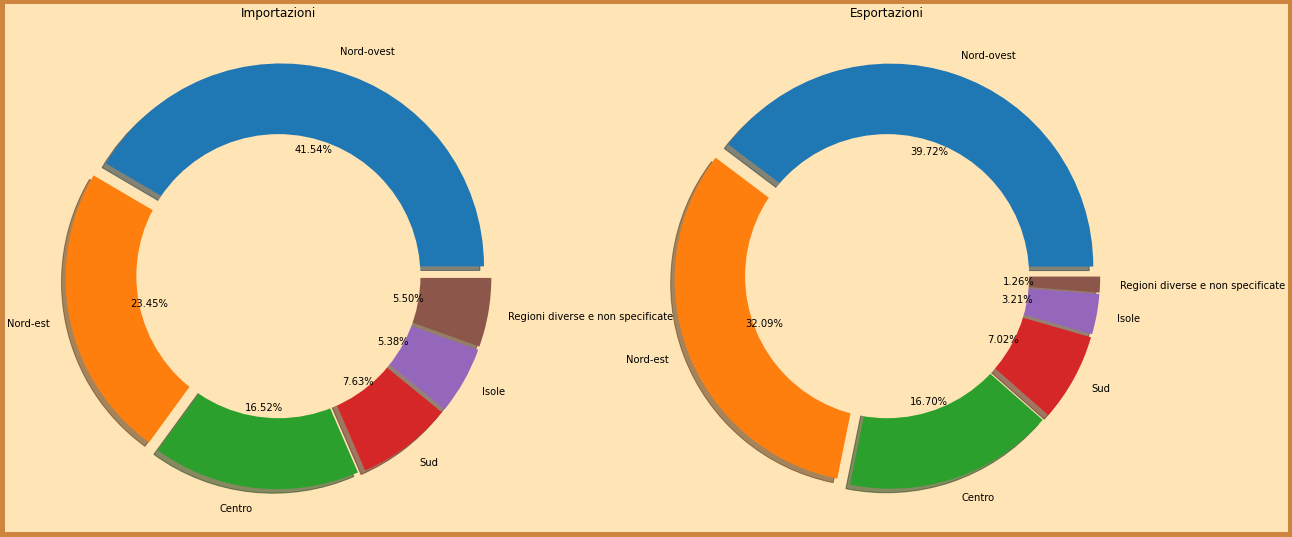

In [4]:
# ===================================================================
# tramite slicing riesco a salvare solo i dati relativi all'anno 2015
# ===================================================================

df2015_I=df_I[-1:]
df2015_E=df_E[-1:]

# ===================================================================
# tramite cicli for faccio il calcolo percentuale delle importazioni
# ===================================================================

i_array=[]                                                                      #vuoto finche non si avvi il ciclo

for x in range(1,7,1):
  i_array.append((float(df2015_I.iloc[:, x])/float(df2015_I.iloc[:, 7]))*100)   #una volta avviato i valori verrano assegnati in i_array

# qui scrivo il ragionamento che ho utilizzato
# i_1=(df2015_I.iloc[:, 1]/df2015_I.iloc[:, 7])*100
# i_2=(df2015_I.iloc[:, 2]/df2015_I.iloc[:, 7])*100
# i_3=(df2015_I.iloc[:, 3]/df2015_I.iloc[:, 7])*100
# i_4=(df2015_I.iloc[:, 4]/df2015_I.iloc[:, 7])*100
# i_5=(df2015_I.iloc[:, 5]/df2015_I.iloc[:, 7])*100
# i_6=(df2015_I.iloc[:, 6]/df2015_I.iloc[:, 7])*100
# print("il 100% di  :",round(sum(i_array),2))

e_array=[]

for x in range(1,7,1):
  e_array.append((float(df2015_E.iloc[:, x])/float(df2015_E.iloc[:, 7]))*100)

# =========================================
# chiamo la function creata precedentemente
# =========================================
plot_perc(i_array,e_array)

# **Richiesta 3**
* Calcolare la media per le importazioni dal 1985 al 2015
* Calcolare la media per le esportazioni dal 1985 al 2015


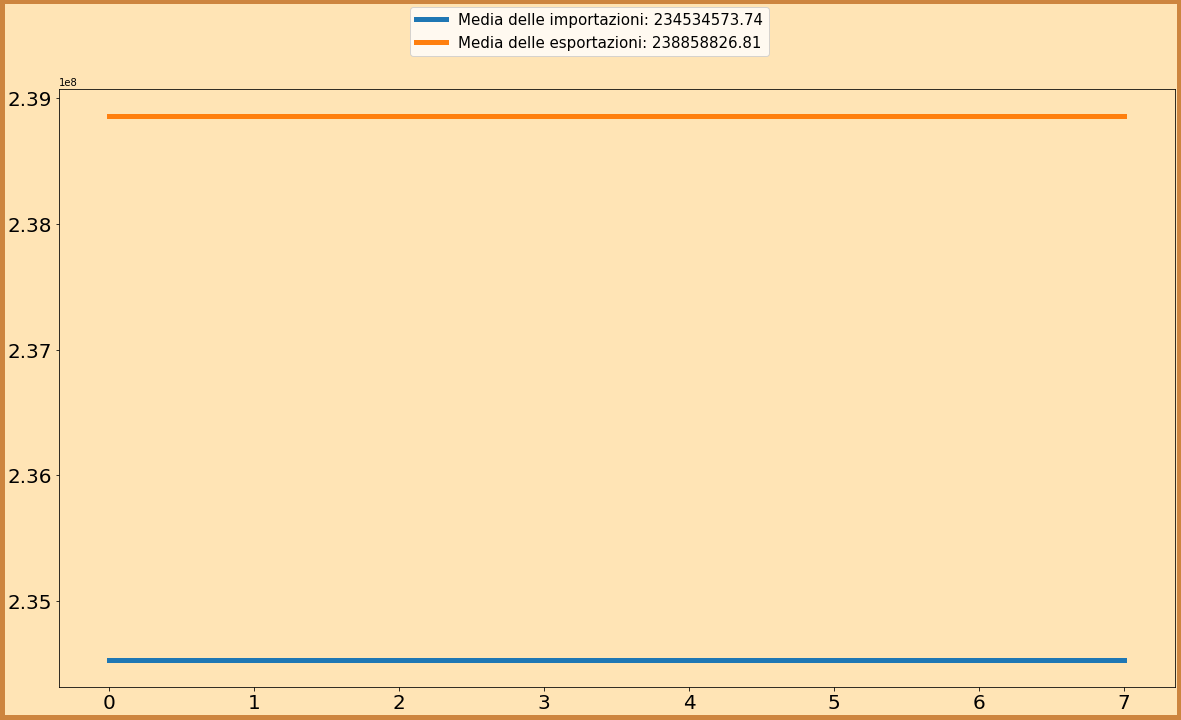

In [5]:
# ========================================================================
# scoprendo che italia è la somma di tutte le regioni le salvo in variabili
# ========================================================================

italia_I=select(df_I,"Italia")
italia_E=select(df_E,"Italia")

# ==============================================================================
# calcolo la media di tutte le importazioni a partire dal anno 1985 fino al 2015
# ==============================================================================

media_I=italia_I.mean()
# print(f"la media di tutte le importazioni è : ${media_I:.2f}")

# ==============================================================================
# calcolo la media di tutte le esportazioni a partire dal anno 1985 fino al 2015
# ==============================================================================
media_E=italia_E.mean()
# print(f"la media di tutte le esportazioni è : ${media_E:.2f}")

# ====================================================================
# creo un grafico semplice per visualizzare la media di tutti gli anni
# ====================================================================

nada=np.arange(8)                                                                                               #array creato con lobbietivo di asegnarlo all'asse x, non fa nada
plt.figure(figsize=(20,11),linewidth=10,edgecolor='peru',facecolor='moccasin')
plt.plot(nada,np.full(nada.size,media_I),label="Media delle importazioni: "+str(round(media_I,2)),linewidth=5)  #round serve ad arrotondare
plt.plot(nada,np.full(nada.size,media_E),label="Media delle esportazioni: "+str(round(media_E,2)),linewidth=5)
ax = plt.gca()
ax.tick_params(labelsize=20)
ax.set_facecolor('moccasin')
plt.legend(bbox_to_anchor =(0.643, 1.15), ncol = 1, prop={'size': 15})
plt.show()

# **Richiesta 4**
* Visualizzare quantitativamente il confronto tra la media delle importazioni e delle esportazioni dal 1985 al 2015


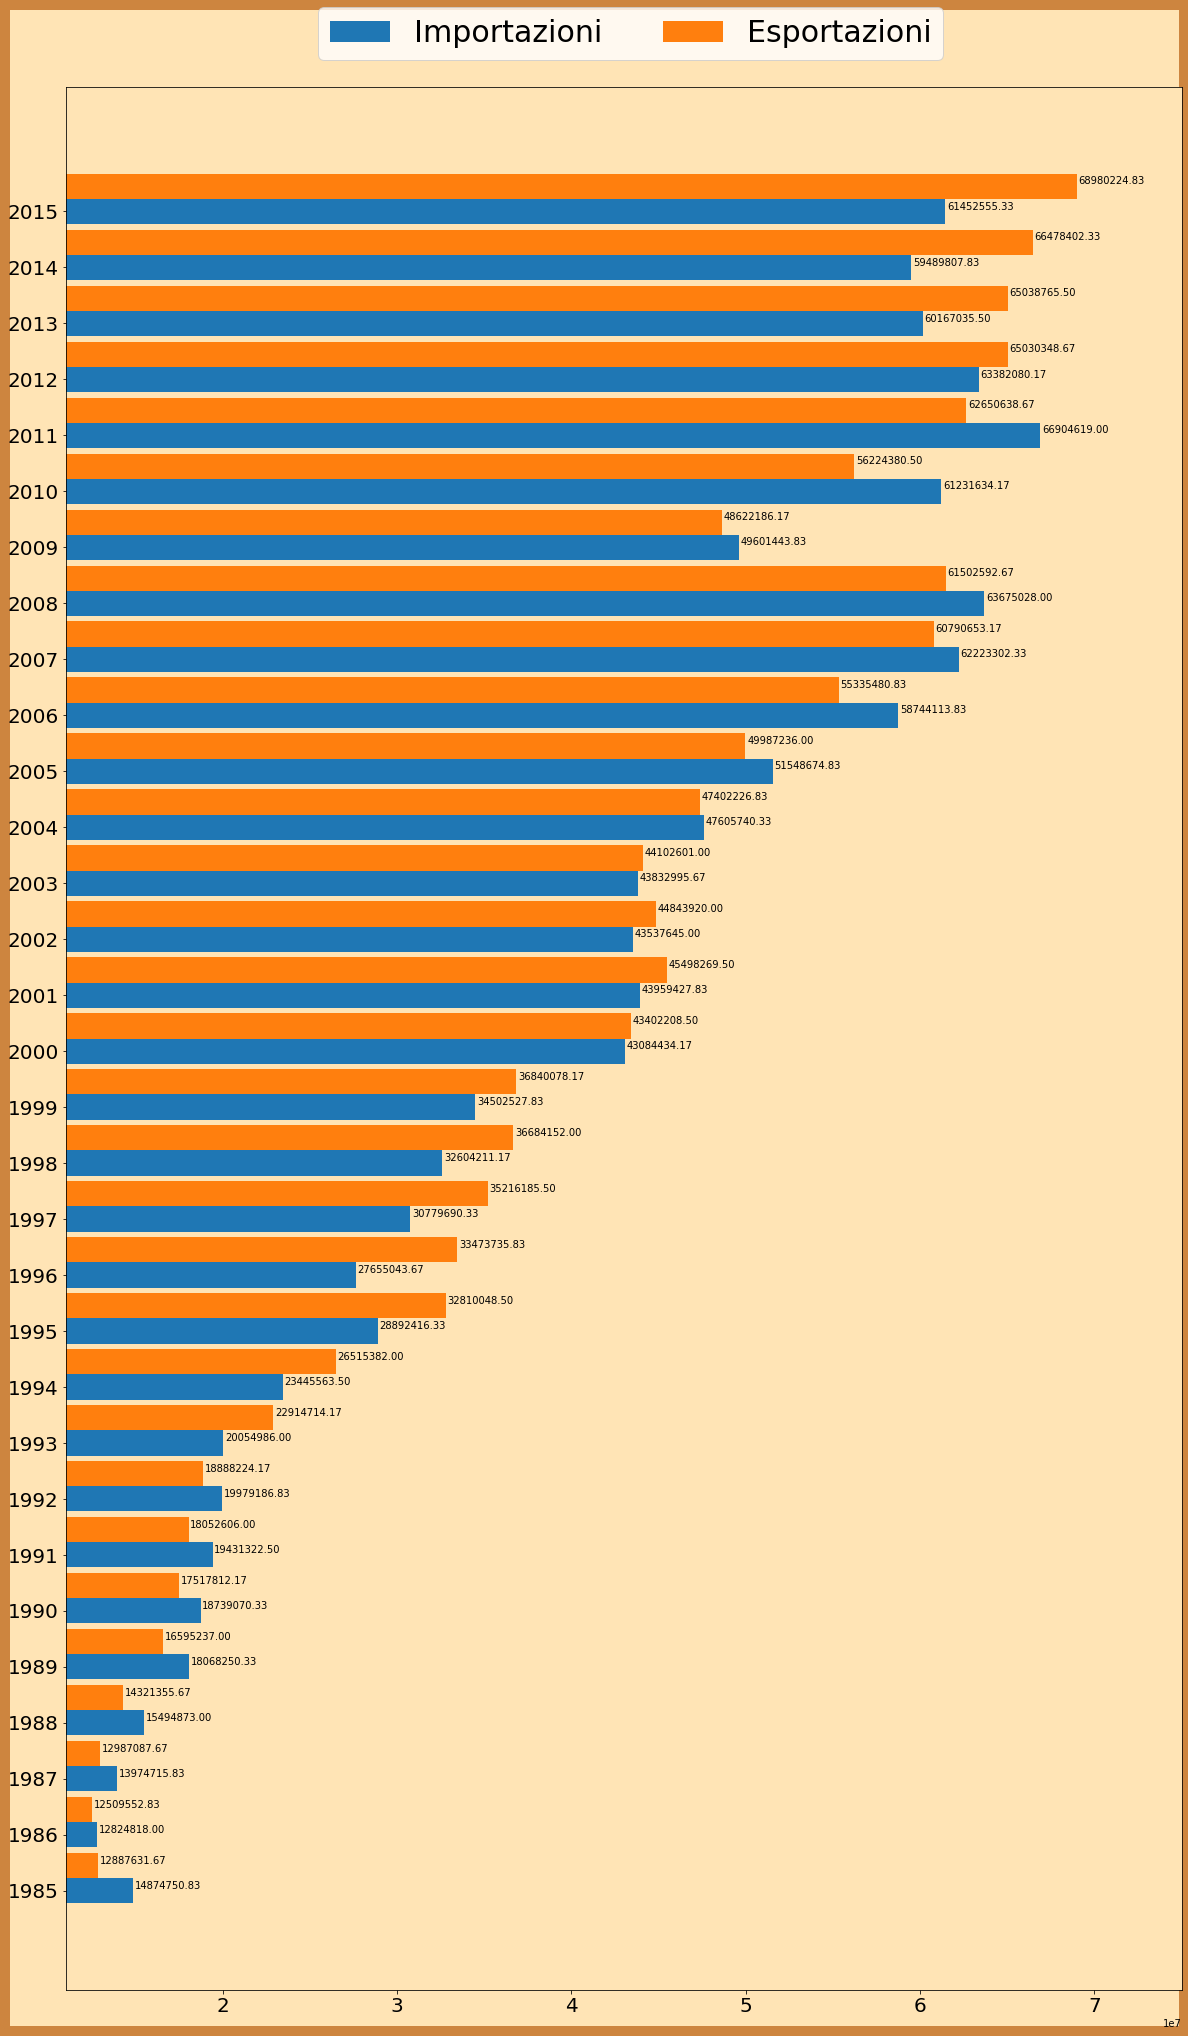

In [6]:
# =========================================
# chiamo la funzione creata precedentemente
# =========================================

plot_barh(anni_I)
#sono ragiunto alla conclusione che il miglior modo per visualizzare un confronto diretto tra
#importazione ed esportazione appartire dal 1985 fino al 2015 era il plt.barh
# io l'ho capito cosi :=)



# **Richiesta 5**

* Visualizzare la relazione tra import ed export in Itlaia
* Calcolare il coefficiente di correlazione tra imoprt ed export in Italia



\begin{align}
coefficiente \ di \ correlazione={covarianza \over (deviazione \ tipica \ di \ importazioni)(deviazione \ tipica \ di \ esportazioni)}
\end{align}

\begin{align}
covarianza={sommaDiMoltIE \over n}{- moltMedieIE}
\end{align}

coefficeinte di correlazione senza formula:  0.9852562889246549
Il coeficiente di correlazione con furmula è:  0.9852562889246547 





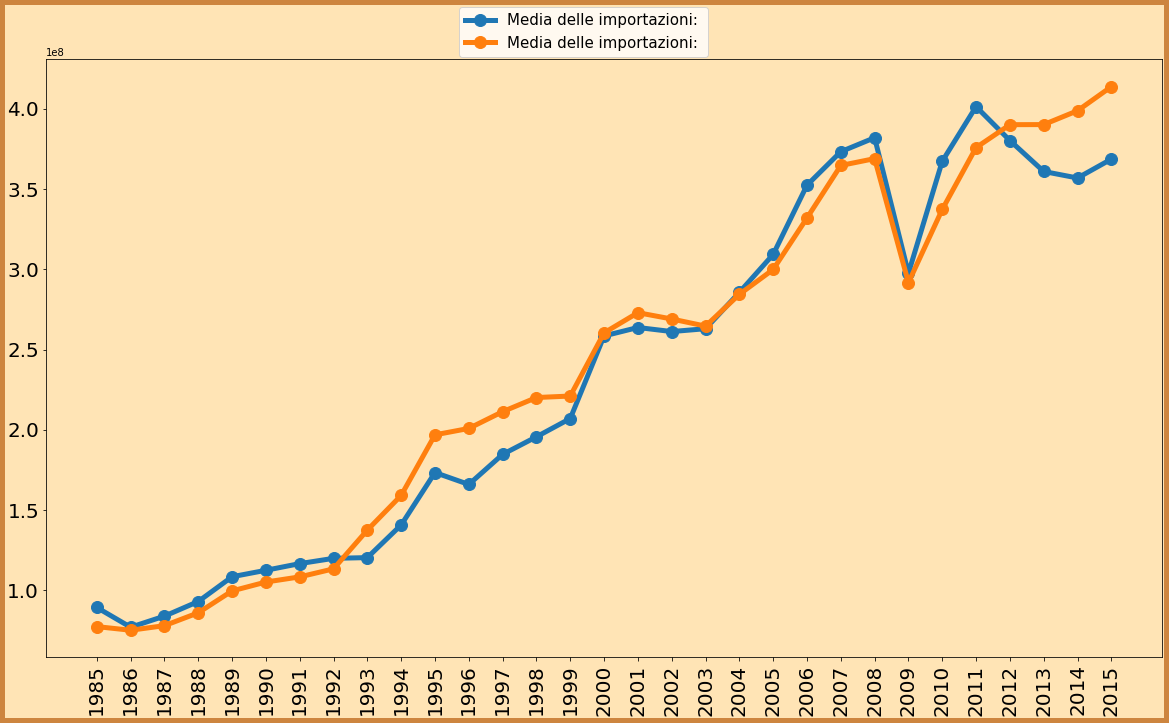

In [7]:
# ==========================================
# coefficiente di correlazione senza formula
# ==========================================

coeficiente_di_correlazione=np.corrcoef(df_I['Italia'],df_E['Italia'])[1,0]
print("coefficeinte di correlazione senza formula: ",coeficiente_di_correlazione)

# ===================================================================================================================
# Coefficiente di correlazione usando formula: covarianza/(deviazione tipica di import * deviazione tipica di export)
# ===================================================================================================================

# ==========
# Covarianza
# ==========

molt_medie_i_E=media_I*media_E
imp_per_exp=df_I['Italia']*df_E['Italia']
somma_di_molt_I_E=(imp_per_exp.mean())
cov=somma_di_molt_I_E-molt_medie_i_E

# ============================
# Varianza di import ed export
# ============================

varianza_I=var(df_I['Italia'])                                                                       #ho preferito utilizzare il metodo fatto a posta per calcolare la varianza
varianza_E=var(df_E['Italia'])

# =====================================
# Deviazione tipica di import ed export
# =====================================

deviazione_tipica_I=np.sqrt(varianza_I)                                                             #in quanto alla deviazione tipica mi è bastato calcolare la radice
deviazione_tipica_E=np.sqrt(varianza_E)

# =====================================
# Coeficiente di correlazione
# =====================================

coeficiente_di_correlazione=cov/(deviazione_tipica_I * deviazione_tipica_E)
print("Il coeficiente di correlazione con furmula è: ",coeficiente_di_correlazione,"\n\n\n")

# ========================================
# Relazione tra import ed export in Italia
# ========================================

plt.figure(figsize=(20,11),linewidth=10,edgecolor='peru',facecolor='moccasin')
plt.plot(anni_I,italia_I,label="Media delle importazioni: ",linewidth=5, marker='o',markersize=12)
plt.plot(anni_E,italia_E,label="Media delle importazioni: ",linewidth=5, marker='o',markersize=12)
plt.xticks(anni_I, rotation=90)
ax = plt.gca()
ax.tick_params(labelsize=20)
ax.set_facecolor('moccasin')
plt.legend(bbox_to_anchor =(0.6, 1.1), ncol = 1, prop={'size': 15})
plt.show()

# **Richiesta 6**

* Dividere i dati delle importazioni e delle esportazioni in intervalli di massimo cinque anni.
* Calcolare le medie (import ed export) per ogni intervallo e solo per i dati reltivi all'Italia.
* Visualizzare l'andamento di import ed export relativo alle medie (media mobile).

,ANNI,Nord-ovest,Nord-est,Centro,Sud,Isole,Regioni diverse e non specificate,Italia,Media di Italia per anno,media mobile
0,1985.0,39970708.0,15946307.0,13531696.0,7463001.0,9053634.0,3283159.0,89248505.0,14874750.83,NaN
1,1990.0,56060049.0,21993495.0,18774041.0,7350146.0,6405503.0,1851187.0,112434422.0,18739070.33,15820345.50
2,1995.0,87509245.0,37572751.0,26835583.0,11521199.0,8961135.0,954584.0,173354498.0,28892416.33,22360695.03
3,2000.0,124633861.0,54532198.0,43237063.0,17586254.0,18330183.0,187046.0,258506605.0,43084434.17,33725181.43
4,2005.0,143448358.0,65351706.0,48844133.0,20603645.0,25215767.0,5828439.0,309292049.0,51548674.83,46096896.73
5,2010.0,154747041.0,77981431.0,58396171.0,27644206.0,24450944.0,24170012.0,367389805.0,61231634.17,59095104.43
6,2015.0,153166521.0,86448491.0,60899857.0,28117636.0,19819354.0,20263474.0,368715332.0,61452555.33,62279219.57


,ANNI,Nord-ovest,Nord-est,Centro,Sud,Isole,Regioni diverse e non specificate,Italia,Media di Italia per anno,media mobile
0,1985.0,33587519.0,19778107.0,12290675.0,5145710.0,3762907.0,2760872.0,77325790.0,12887631.67,NaN
1,1990.0,49327634.0,28895192.0,15727223.0,6315543.0,3119767.0,1721513.0,105106873.0,17517812.17,14786209.07
2,1995.0,89986631.0,58639023.0,29971731.0,14044290.0,4191010.0,27605.0,196860291.0,32810048.50,23836194.97
3,2000.0,107154835.0,80517774.0,43338616.0,20763202.0,7929929.0,708897.0,260413251.0,43402208.50,37123272.00
4,2005.0,122058512.0,92830892.0,45252251.0,22691524.0,11075132.0,6015105.0,299923416.0,49987236.00,46366850.67
5,2010.0,134948422.0,105820307.0,53604997.0,24399416.0,14556073.0,4017068.0,337346283.0,56224380.50,56495058.67
6,2015.0,164400918.0,132807237.0,69107846.0,29067941.0,13272239.0,5225166.0,413881349.0,68980224.83,65635676.00


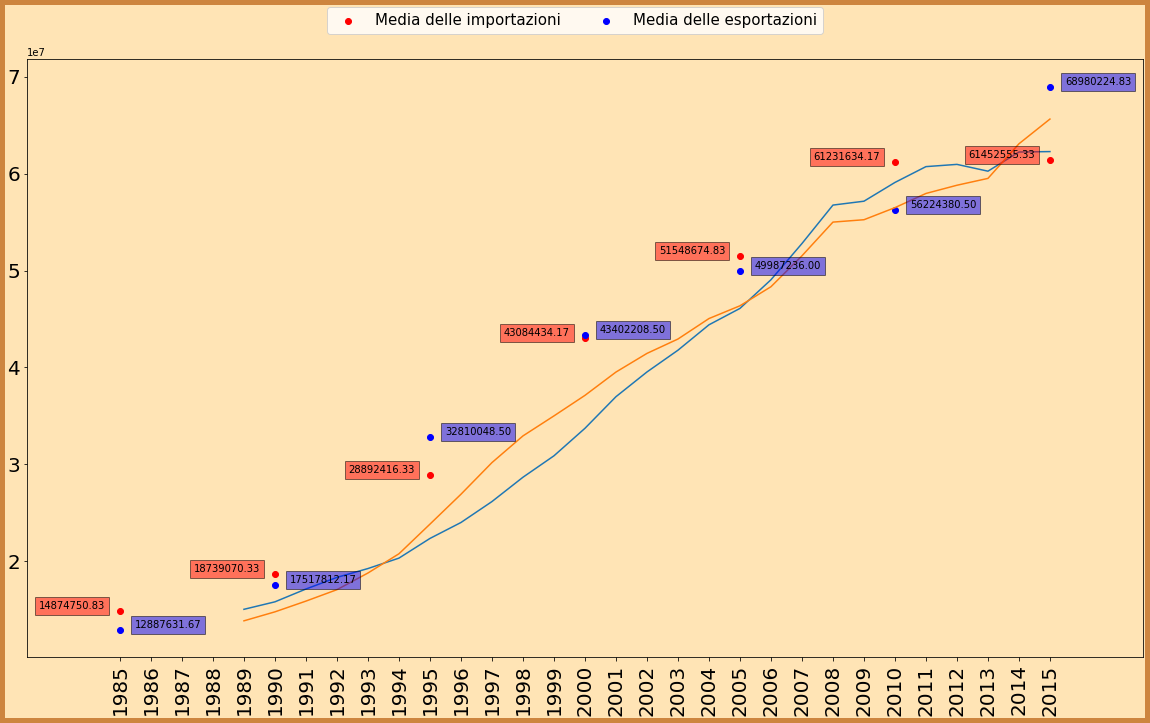

In [8]:
# ====================================================================================
# ho deciso di inserire questi dati nel dataset in modo si possa visualizare in futuro
# ====================================================================================

df_I["Media di Italia per anno"]=medArr_I.round(2)
df_E["Media di Italia per anno"]=medArr_E.round(2)

# =================================================================
# media mobile anche questi dati ho deciso di inserirli nel dataset
# =================================================================

df_I["media mobile"]=round(df_I["Media di Italia per anno"].rolling(5).mean(),2)              #rollin().mean() serve per prendere n numeri fa la media scende in colonna 1 step e fa la media fino ad arrivare alla fine
df_E["media mobile"]=round(df_E["Media di Italia per anno"].rolling(5).mean(),2)
# display(df_I)
# display(df_E)

# =============================================================================================================
# ho creato un filtro atraverso un ciclo for sfrutando il metodo appened per riempire solo con i dati richiesti
# =============================================================================================================
ogni_5_I=[]
for x in range(0,31,5):
  lala=df_I.iloc[x]
  ogni_5_I.append(lala.to_numpy(float))
# print(ogni_5_I)
ogni_5_E=[]
for x in range(0,31,5):
  lala=df_E.iloc[x]
  ogni_5_E.append(lala.to_numpy(float))
# print(ogni_5_E)

# ============================================================================================
# ho deciso di farli diventare dataframe per poter visualizzare i nuovi dataset da 5 in 5 anni
# ============================================================================================

df_5_I=pd.DataFrame(ogni_5_I,columns=df_I.columns)
display(df_5_I)
df_5_E=pd.DataFrame(ogni_5_E,columns=df_E.columns)
display(df_5_E)

# =======================================================================
# ho calcolato la media delle importazioni nel nuovo dataframe creato
# =======================================================================
med_5_I=[]
med_5_E=[]
anni_5=df_5_I["ANNI"].to_numpy(int)
for x in range(0,7,1):
  med_5_I.append(float(df_5_I.iloc[x,7]/6))                                                   #essendo Italia la somma di tutte le regioni mi è bastato dividerlo per il numero dellew regione
# print(med_5_I)
for x in range(0,7,1):
  med_5_E.append(float(df_5_E.iloc[x,7]/6))
# print(med_5_E)

# ============================================================================================================================
# ho creato il mio grafico per visualizzare le medie rispetto agli anni di 5 in 5 e inoltre ho anche disegnato la media mobile
# ============================================================================================================================

plt.figure(figsize=(20,11),linewidth=10,edgecolor='peru',facecolor='moccasin')
plt.plot(df_I["ANNI"],df_I['media mobile'])
plt.plot(df_E["ANNI"],df_E['media mobile'])
plt.scatter(df_5_I["ANNI"],med_5_I,label="Media delle importazioni",color="red")
plt.scatter(df_5_E["ANNI"],med_5_E,label="Media delle esportazioni",color="blue")

ax = plt.gca()
ax.tick_params(labelsize=20)
plt.xticks(df_I["ANNI"],rotation=90)
ax.set_facecolor('moccasin')
ax.set_xlim(xmin=1982, xmax=2018)
plt.legend(bbox_to_anchor =(0.72, 1.1), ncol = 2, prop={'size': 15})

# =========================================================================================================
# e unaltra volta ancora questi cicli  mi hanno aiutato ad inserire i rispetivi dati text dentro il grafico
# =========================================================================================================
for x, y in zip(df_5_I["ANNI"],med_5_I):
    plt.text(x-1.55 , y, '%.2f' % y, ha='center', va='bottom',bbox=dict(facecolor='red', alpha=0.5))
for x, y in zip(df_5_E["ANNI"],med_5_E):
    plt.text(x+1.55 , y, '%.2f' % y, ha='center', va='bottom',bbox=dict(facecolor='blue', alpha=0.5))
plt.show()